In [2]:
import pandas as pd
import matplotlib
import numpy as np
import bs4
import requests
import matplotlib.pyplot as plt
from src.web_scraping.string_formatter import StringFormatter
import src.country_metrics.numerical_metrics as numerical_metrics
import src.web_scraping.web_scraper as web_scraper
import src.web_scraping.destructuring as destructuring
builder = StringFormatter.from_base("https://www.cia.gov/the-world-factbook")
field_builder = builder.append("field/{field}/")

(array([110.,  48.,  29.,  14.,  13.,   7.,   3.,   4.,   0.,   1.]),
 array([ 1.37 , 10.657, 19.944, 29.231, 38.518, 47.805, 57.092, 66.379,
        75.666, 84.953, 94.24 ]),
 <BarContainer object of 10 artists>)

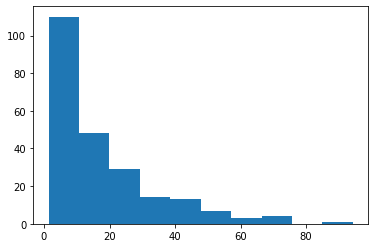

In [3]:
response = requests.get(field_builder.put_params(field='infant-mortality-rate'))
countries_paragraphs = web_scraper.retrieve_paragraph_contents(response.content)
infant_mortality_rate = numerical_metrics.get_country_infant_mortality_rate(countries_paragraphs)
infant_mortality_rate = infant_mortality_rate.dropna()

plt.hist(infant_mortality_rate['female'])

In [2]:
builder = StringFormatter.from_base("https://www.cia.gov/the-world-factbook")
field_builder = builder.append("field/{field}/")
response = requests.get(field_builder.put_params(field='population'))
soup = bs4.BeautifulSoup(response.content)
countries_population = soup.body.find('main', attrs={'id': 'main-content'}).find_all('ul')[0]
len(countries_population.find_all('li'))

282

In [4]:
soup.body.find('main', attrs={'id': 'main-content'}).find('ul').find_all('li')

[<li><h2 class="h3"><a href="/the-world-factbook/countries/afghanistan">Afghanistan</a></h2><p>39,232,003 (2023 est.)</p></li>,
 <li><h2 class="h3"><a href="/the-world-factbook/countries/akrotiri">Akrotiri</a></h2><p>(2020) approximately 18,195 on the Sovereign Base Areas of Akrotiri and Dhekelia including 11,000 Cypriots and 7,195 Service and UK-based contract personnel and dependents</p></li>,
 <li><h2 class="h3"><a href="/the-world-factbook/countries/albania">Albania</a></h2><p>3,101,621 (2023 est.)</p></li>,
 <li><h2 class="h3"><a href="/the-world-factbook/countries/algeria">Algeria</a></h2><p>44,758,398 (2023 est.)</p></li>,
 <li><h2 class="h3"><a href="/the-world-factbook/countries/american-samoa">American Samoa</a></h2><p>44,620 (2023 est.)</p></li>,
 <li><h2 class="h3"><a href="/the-world-factbook/countries/andorra">Andorra</a></h2><p>85,468 (2023 est.)</p></li>,
 <li><h2 class="h3"><a href="/the-world-factbook/countries/angola">Angola</a></h2><p>35,981,281 (2023 est.)</p></li>

In [7]:
countries_population.find_all('li')[0].p

<p>39,232,003 (2023 est.)</p>

In [9]:
response = requests.get(field_builder.put_params(field='alcohol-consumption-per-capita'))
soup = bs4.BeautifulSoup(response.content)
alcohol_consumption = soup.body.find('main', attrs={'id': 'main-content'}).find_all('ul')[0]
len(alcohol_consumption.find_all('li'))

189

In [11]:
alcohol_consumption_per_country = alcohol_consumption.find_all('li')
alcohol_consumption_per_country[0].p.contents

[<strong>total: </strong>,
 '0.01 liters of pure alcohol (2019 est.)',
 <br/>,
 <br/>,
 <strong>beer: </strong>,
 '0 liters of pure alcohol (2019 est.)',
 <br/>,
 <br/>,
 <strong>wine: </strong>,
 '0 liters of pure alcohol (2019 est.)',
 <br/>,
 <br/>,
 <strong>spirits: </strong>,
 '0.01 liters of pure alcohol (2019 est.)',
 <br/>,
 <br/>,
 <strong>other alcohols: </strong>,
 '0 liters of pure alcohol (2019 est.)']

In [11]:
response = requests.get(field_builder.put_params(field='death-rate'))
soup = bs4.BeautifulSoup(response.content)
death_rate = soup.body.find('main', attrs={'id': 'main-content'}).find_all('ul')[0]
len(death_rate.find_all('li'))

253

In [13]:
death_rates_by_country = death_rate.find_all('li')

In [23]:
print(death_rates_by_country[0].a.contents)
print(death_rates_by_country[0].p.contents)

['Afghanistan']
['12.08 deaths/1,000 population (2023 est.)']


In [3]:
response = requests.get(field_builder.put_params(field='infant-mortality-rate'))
countries_paragraphs = web_scraper.retrieve_paragraph_contents(response.content)
numerical_metrics.get_country_infant_mortality_rate(countries_paragraphs)

TypeError: 'NoneType' object is not subscriptable